## 2 The Factors
Use the data found in ‘factor pricing data.xlsx’.
- FACTORS: Monthly excess return data for the overall equity market, $\tilde{r}^{MKT}$. The sheet also
contains data on five additional factors. All factor data is already provided as **excess returns**

### 1. Analyze the factors, similar to how you analyzed the three Fama-French factors in Homework 4.
#### You now have three additional factors, so let’s compare there univariate statistics.
- mean
- volatility
- Sharpe

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.precision", 4)

In [32]:
def compute_tangency(df_tilde, diagonalize_Sigma=False):

    Sigma = df_tilde.cov()

    # N is the number of assets

    N = Sigma.shape[0]

    Sigma_adj = Sigma.copy()

    if diagonalize_Sigma:

        Sigma_adj.loc[:,:] = np.diag(np.diag(Sigma_adj))

    mu_tilde = df_tilde.mean()

    Sigma_inv = np.linalg.inv(Sigma_adj)

    weights = Sigma_inv @ mu_tilde / (np.ones(N) @ Sigma_inv @ mu_tilde)

    # For convenience, I'll wrap the solution back into a pandas.Series object.
    omega_tangency = pd.Series(weights, index=mu_tilde.index)
    
    return omega_tangency

In [7]:
#Calculate mean, standard deviation and sharpe ratio
def mean_vol_sharpe(df,ann=12):
    mean = df.mean() * ann
    volatility = df.std() * np.sqrt(ann)
    sharpe_ratio = mean/volatility
    return pd.DataFrame({'mean': mean, 'volatility': volatility, 'sharpe_ratio': sharpe_ratio})

In [21]:
#take the mean_vol_sharpe for specific dates like ['1926','1980']
def stats_by_date(df, start_date, end_date):
    df = mean_vol_sharpe(df.loc[start_date:end_date])
    df.rename(columns={'mean':'mean '+start_date+'-'+end_date}, inplace=True)
    df.rename(columns={'volatility':'volatility '+start_date+'-'+end_date}, inplace=True)
    df.rename(columns={'sharpe_ratio':'sharpe_ratio '+start_date+'-'+end_date}, inplace=True)
    return df

In [6]:
df = pd.read_excel('factor_pricing_data.xlsx',1,index_col=0)
df.index = pd.to_datetime(df.index)
df

,MKT,SMB,HML,RMW,CMA,UMD
Date,,,,,,
1980-01-31,0.0551,0.0183,0.0175,-0.0170,0.0164,0.0755
1980-02-29,-0.0122,-0.0157,0.0061,0.0004,0.0268,0.0788
1980-03-31,-0.1290,-0.0693,-0.0101,0.0146,-0.0119,-0.0955
1980-04-30,0.0397,0.0105,0.0106,-0.0210,0.0029,-0.0043
1980-05-31,0.0526,0.0211,0.0038,0.0034,-0.0031,-0.0112
...,...,...,...,...,...,...
2022-04-30,-0.0946,-0.0040,0.0619,0.0363,0.0592,0.0489
2022-05-31,-0.0034,-0.0006,0.0841,0.0144,0.0398,0.0248
2022-06-30,-0.0843,0.0130,-0.0597,0.0185,-0.0470,0.0079


In [8]:
mean_vol_sharpe(df)

,mean,volatility,sharpe_ratio
MKT,0.0831,0.1567,0.5305
SMB,0.0122,0.1005,0.1211
HML,0.0275,0.1088,0.2529
RMW,0.0448,0.0834,0.5376
CMA,0.0333,0.0715,0.4652
UMD,0.0655,0.1545,0.4241


### 2. Based on the factor statistics above, answer the following.
#### 2(a) Does each factor have a positive risk premium (positive expected excess return)?
#### Ans 2(a) Yes, all the factors have positive expected excess return in the given timeperiod from 1980 to 2022

#### (b) How have the factors performed since the time of the case, (2015-present)?

#### Ans 2(b) SMB and HML are the only factors which have a negative market premia

In [28]:
stats_by_date(df,'2015','2022')

,mean 2015-2022,volatility 2015-2022,sharpe_ratio 2015-2022
MKT,0.1069,0.1602,0.6676
SMB,-0.0058,0.0977,-0.0590
HML,-0.0197,0.1325,-0.1488
RMW,0.0395,0.0712,0.5553
CMA,0.0022,0.0796,0.0282
UMD,0.0255,0.1368,0.1865


## 3. Report the correlation matrix across the six factors.

<AxesSubplot:>

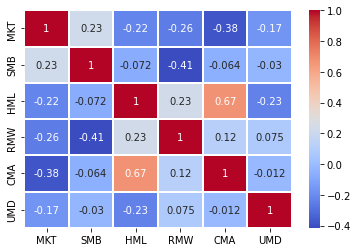

In [31]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.2)

#### 3(a) Does the construction method succeed in keeping correlations small?
#### Ans 3(a) Yes the Correlations are low overall. Though the CMA-HML correlation is around 67% which can be considered a bit on the higher side comparatively.

#### 3(b) Fama and French say that HML is somewhat redundant in their 5-factor model. Does this seem to be the case?
#### And 3(b) Indeed, as HML is 67% correlatd to CMA, it does seem somewhat redundant


## 4. Report the tangency weights for a portfolio of these 6 factors.
#### 4(a) Which factors seem most important? And Least?

#### Ans 4(a) CMA, RMW and MKT seem to be the most important factors. HML,SMB and UMB seems to be the least important factors with low weights.

In [45]:
w_t = pd.DataFrame(compute_tangency(df),columns=['weight_tangency'],index=df.columns)
w_t

,weight_tangency
MKT,0.2011
SMB,0.0816
HML,-0.0470
RMW,0.2884
CMA,0.3774
UMD,0.0986


In [62]:
low = mean_vol_sharpe(df).merge(w_t, left_index=True, right_index=True)
low

,mean,volatility,sharpe_ratio,weight_tangency
MKT,0.0831,0.1567,0.5305,0.2011
SMB,0.0122,0.1005,0.1211,0.0816
HML,0.0275,0.1088,0.2529,-0.0470
RMW,0.0448,0.0834,0.5376,0.2884
CMA,0.0333,0.0715,0.4652,0.3774
UMD,0.0655,0.1545,0.4241,0.0986


#### 4(b) Are the factors with low mean returns still useful?
#### Ans 4(b) Yes, the factors with low mean returns are still useful as is apparent from their tangency allocation weights. From the scatter plot below we can see that assets with moderate mean excess returns still have a higher tangency allocation weight.

Text(0, 0.5, 'weight_tangency')

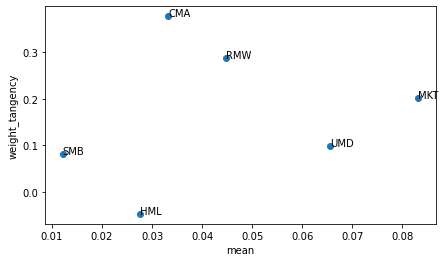

In [64]:
#plot mean abd weight_tangency for each asset
fig, ax = plt.subplots(figsize=(7,4))
ax.scatter(low['mean'], low['weight_tangency'])
for i, txt in enumerate(low.index):
    ax.annotate(txt, (low['mean'][i], low['weight_tangency'][i]))
plt.xlabel('mean')
plt.ylabel('weight_tangency')

#### 4 (c) Re-do the tangency portfolio, but this time only include MKT, SMB, HML, and UMD. Which factors get high/low tangency weights now?
#### Ans 4(c) MKT, HML and UMD get high tangency weights and SMB gets a low tangency weight. CMA and MKT had 67% correlation. Removing CMA from the dataset help increase the tangency weight of MKT.

In [70]:
compute_tangency(df[['MKT','SMB','HML','UMD']])

MKT    0.3314
SMB    0.0061
HML    0.3622
UMD    0.3003
dtype: float64

#### What do you conclude about the importance or unimportance of these styles?
#### Ans- We can conclude that the importance is contingent upon the cross correlations between the assets use for the allocation

![title](1.png)

In [74]:
def timeseries_test(df, factor_df, factors, ann=12):
    result = pd.DataFrame(data = None, index = df.columns, columns = ['alpha','beta'])
    
    for i in df.columns:
        X = sm.add_constant(factor_df[factors])
        y = df[i]
        model = sm.OLS(y, X).fit()
        result.loc[i,'alpha'] = model.params[0]
        result.loc[i,'beta'] = model.params[1]
    return result

In [76]:
capm = ['MKT']
ff_3f = ['MKT','SMB','HML']
ff_5f = ['MKT','SMB','HML','RMW','CMA']
aqr =  ['MKT','HML','RMW','UMD']

## 3.1 Test the AQR 4-Factor Model using the time-series test. (We are not doing the cross-sectional regression tests.)
#### (a) For each regression, report the estimated $α$ and r-squared.

In [73]:
portfolios = pd.read_excel('factor_pricing_data.xlsx',2,index_col=0)
portfolios.index = pd.to_datetime(portfolios.index)
portfolios.head(3)

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-31,-0.0050,0.0283,0.0084,0.1024,-0.0143,0.0999,0.0354,0.0352,0.0048,0.0032,...,0.0159,0.0876,0.0463,-0.0116,0.0458,-0.0279,0.0258,0.0751,0.0299,0.0665
1980-02-29,0.0111,-0.0610,-0.0966,-0.0319,-0.0569,-0.0314,-0.0527,-0.0788,-0.0556,-0.0140,...,-0.0079,-0.0535,-0.0339,-0.0633,-0.0638,-0.0855,-0.0960,-0.0314,-0.0275,-0.0267
1980-03-31,-0.2244,-0.1116,-0.0167,-0.1464,-0.0192,-0.1281,-0.0817,-0.1278,-0.0565,-0.0664,...,-0.0821,-0.1511,-0.1106,-0.0922,-0.1443,-0.0563,-0.0883,-0.2441,-0.1245,-0.1728


In [80]:
aqr_test = timeseries_test(portfolios, df, aqr)
aqr_test

,alpha,beta
Agric,0.0013,0.8209
Food,0.0013,0.6826
Soda,0.002,0.7911
Beer,0.0022,0.7272
Smoke,0.0033,0.7227
Toys,-0.0023,1.1111
Fun,0.0023,1.2383
Books,-0.0024,1.1088
Hshld,-0.0001,0.7549
Clths,-0.0001,1.0987


#### 1.(b) Calculate the mean-absolute-error of the estimated alphas, (one for each security, $\tilde{r}^{i} $ .)
#### $ MAE = \frac{1}{n}\sum_{i=1}^{n} |\^{\alpha}^{i}| = 1  $ 

#### If the pricing model worked, should these alpha estimates be large or small? Why? Based on your MAE stat, does this seem to support the pricing model or not?

In [83]:
round(aqr_test['alpha'].abs().mean(),5)

0.00196